In [1]:
import pandas as pd
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
columns = ['Id','information','sentiment','text']
train = pd.read_csv('twitter_training.csv', names = columns)

In [3]:
train.shape

(74682, 4)

In [4]:
train.head()

,Id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
train.duplicated().sum()

2700

In [6]:
train = train.drop_duplicates()

In [7]:
train.shape

(71982, 4)

In [8]:
train['text'] = train['text'].astype(str)
train['len'] = train['text'].apply(len)

In [9]:
train.head()

,Id,information,sentiment,text,len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


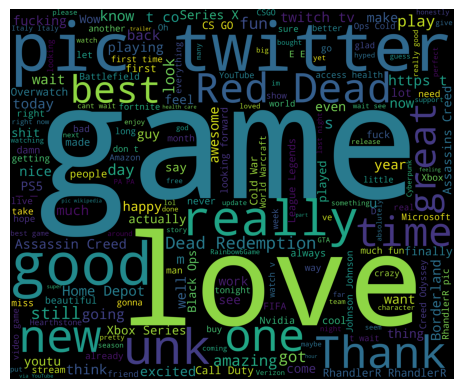

In [10]:
df1 = train[train['sentiment'] == 'Positive']
words = ' '.join(df1['text'])
cleaned = ' '.join([word for word in words.split() if word not in stopwords.words('English')])              
cleaned_plot = WordCloud(background_color='black', stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned))
plt.imshow(cleaned_plot)
plt.axis("off")
plt.show()

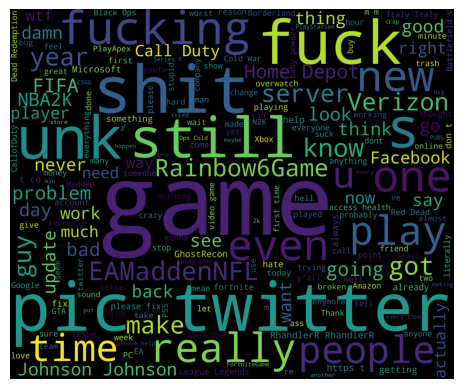

In [11]:
df2 = train[train['sentiment'] == 'Negative']
words = ' '.join(df2['text'])
cleaned = ' '.join([word for word in words.split() if word not in stopwords.words('English')])              
cleaned_plot = WordCloud(background_color='black', stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned))
plt.imshow(cleaned_plot)
plt.axis("off")
plt.show()

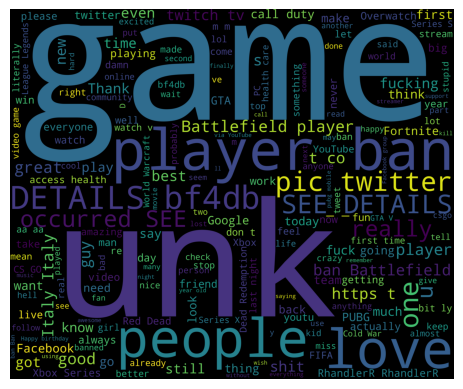

In [12]:
df3 = train[train['sentiment'] == 'Irrelevant']
words = ' '.join(df3['text'])
cleaned = ' '.join([word for word in words.split() if word not in stopwords.words('English')])              
cleaned_plot = WordCloud(background_color='black', stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned))
plt.imshow(cleaned_plot)
plt.axis("off")
plt.show()

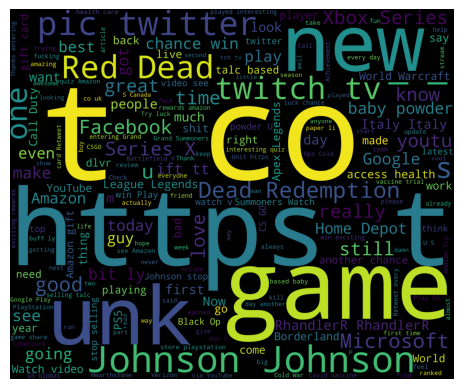

In [13]:
df4 = train[train['sentiment'] == 'Neutral']
words = ' '.join(df4['text'])
cleaned = ' '.join([word for word in words.split() if word not in stopwords.words('English')])              
cleaned_plot = WordCloud(background_color='black', stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned))
plt.imshow(cleaned_plot)
plt.axis("off")
plt.show()

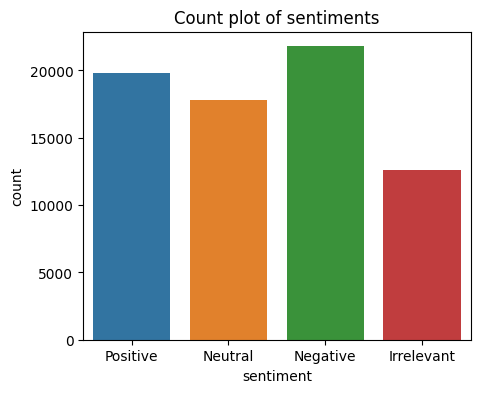

In [14]:
plt.figure(figsize = (5,4))
plt.title('Count plot of sentiments')
sns.countplot(x = 'sentiment', data = train)
plt.show()

In [15]:
counts = train['sentiment'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()

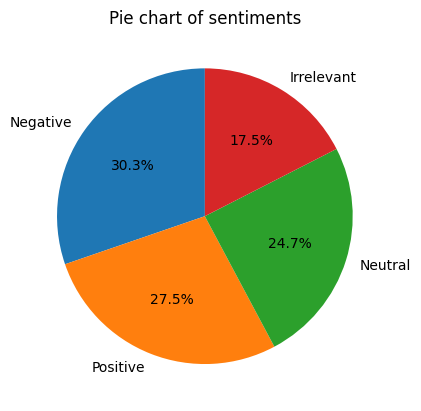

In [16]:
plt.title('Pie chart of sentiments')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [17]:
df5 = train.groupby(by=['information','sentiment']).count().reset_index()

In [18]:
df5.shape

(128, 5)

In [19]:
df5.head()

,information,sentiment,Id,text,len
0,Amazon,Irrelevant,187,187,187
1,Amazon,Negative,566,566,566
2,Amazon,Neutral,1207,1207,1207
3,Amazon,Positive,304,304,304
4,ApexLegends,Irrelevant,185,185,185


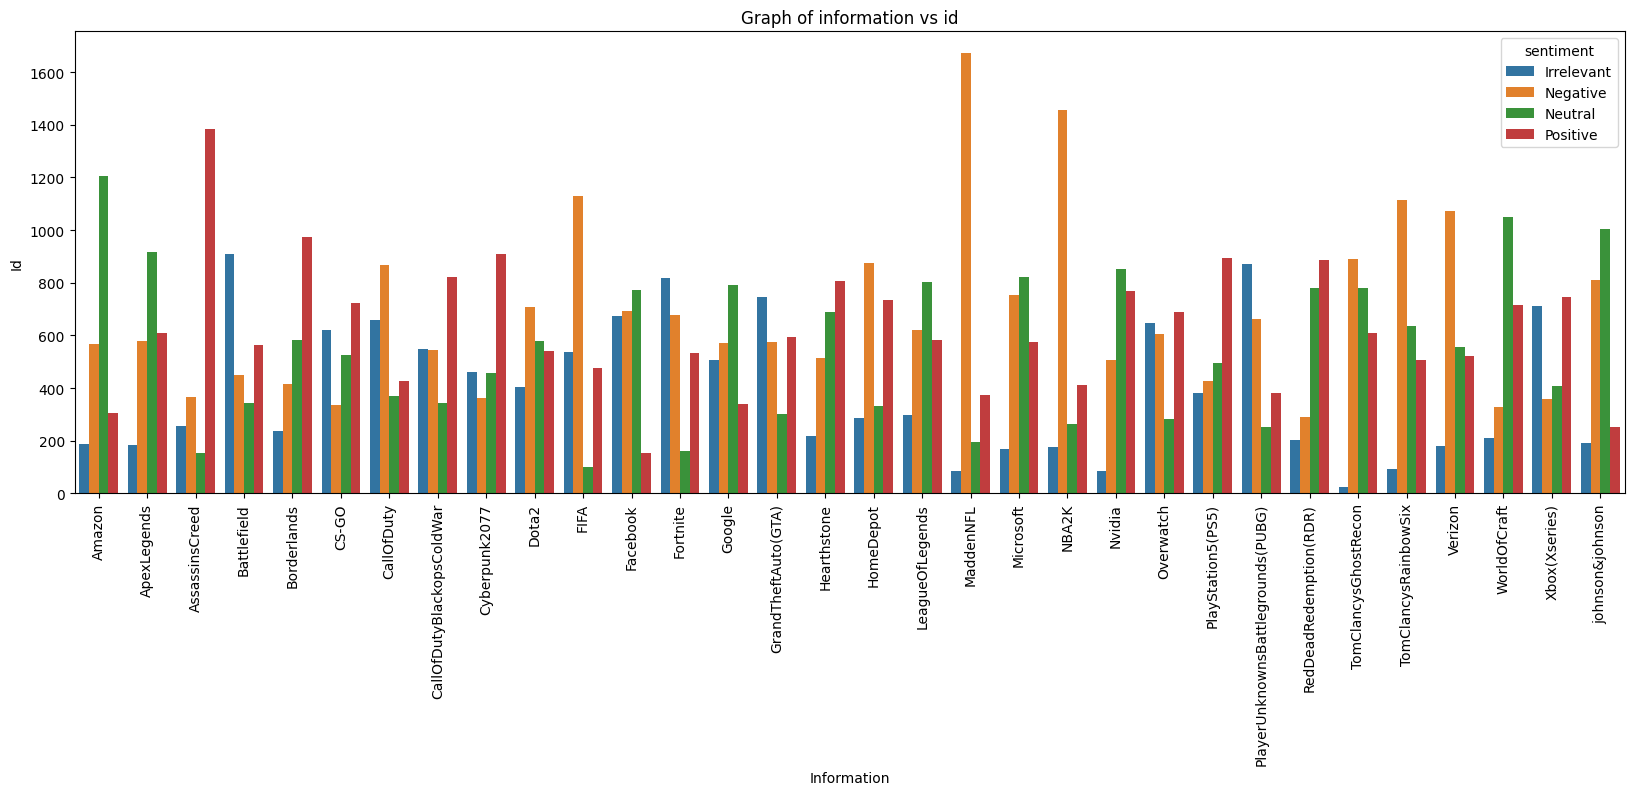

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(data=df5,x="information",y="Id",hue="sentiment")
plt.xlabel('Information')
plt.ylabel('Id')
plt.title('Graph of information vs id')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='len', ylabel='Density'>

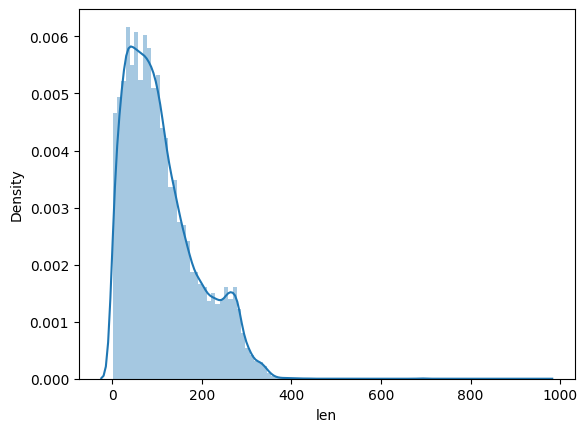

In [21]:
sns.distplot(train['len'], bins = 100)

In [22]:
def clear_words(review):
    cleaned_text = re.sub(r'[^\w\s]', '', review)
    words = cleaned_text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords.words('English')]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

In [23]:
train['cleaned_text'] = train['text'].apply(clear_words)

In [24]:
train.head()

,Id,information,sentiment,text,len,cleaned_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,im getting borderlands 2 murder


In [25]:
print(train['cleaned_text'].iloc[0])
print(train['text'].iloc[0])

im getting borderlands murder
im getting on borderlands and i will murder you all ,


In [26]:
le = LabelEncoder()

In [27]:
train['sentiment'] = le.fit_transform(train['sentiment'])

In [28]:
x = train['cleaned_text']
y = train['sentiment']

In [29]:
vec=TfidfVectorizer()
x=vec.fit_transform(x)

In [30]:
x.shape

(71982, 40633)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [32]:
x_train.shape

(50387, 40633)

In [33]:
y_train.shape

(50387,)

In [34]:
rfc = RandomForestClassifier(n_estimators=50)

In [35]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [36]:
pred = rfc.predict(x_test)

In [37]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3152
           1       0.92      0.90      0.91      6728
           2       0.87      0.90      0.89      5137
           3       0.92      0.84      0.88      6578

    accuracy                           0.89     21595
   macro avg       0.88      0.90      0.89     21595
weighted avg       0.89      0.89      0.89     21595



In [38]:
print(accuracy_score(pred, y_test))

0.8912248205603149


In [39]:
svm = LinearSVC()

In [40]:
svm.fit(x_train, y_train)

LinearSVC()

In [41]:
pred1 = svm.predict(x_test)

In [42]:
print(classification_report(pred1, y_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      3330
           1       0.88      0.85      0.87      6790
           2       0.84      0.82      0.83      5454
           3       0.85      0.84      0.84      6021

    accuracy                           0.84     21595
   macro avg       0.84      0.85      0.84     21595
weighted avg       0.84      0.84      0.84     21595



In [43]:
nb = MultinomialNB()

In [44]:
nb.fit(x_train, y_train)

MultinomialNB()

In [45]:
pred2 = nb.predict(x_test)

In [46]:
print(classification_report(pred2, y_test))

              precision    recall  f1-score   support

           0       0.36      0.95      0.53      1431
           1       0.91      0.62      0.74      9549
           2       0.59      0.84      0.69      3723
           3       0.79      0.69      0.73      6892

    accuracy                           0.70     21595
   macro avg       0.66      0.77      0.67     21595
weighted avg       0.78      0.70      0.72     21595



In [47]:
kneighbor = KNeighborsClassifier()

In [48]:
kneighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
pred3 = kneighbor.predict(x_test)

In [50]:
print(classification_report(pred3, y_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      2894
           1       0.88      0.95      0.91      6131
           2       0.96      0.76      0.85      6680
           3       0.86      0.88      0.87      5890

    accuracy                           0.87     21595
   macro avg       0.86      0.88      0.86     21595
weighted avg       0.88      0.87      0.87     21595



In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
pred4 = dt.predict(x_test)

In [54]:
print(classification_report(pred4, y_test))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      3339
           1       0.81      0.80      0.80      6663
           2       0.74      0.78      0.76      5037
           3       0.80      0.73      0.77      6556

    accuracy                           0.77     21595
   macro avg       0.76      0.77      0.76     21595
weighted avg       0.77      0.77      0.77     21595

